# Alzheimer's Prevention

Alzheimer's disease is a neurodegenerative disease and one of the most widely spread across the world https://en.wikipedia.org/wiki/Alzheimer%27s_disease. In this project, a dataset from more than 2.000 patients will be used to train a Logistic Regression model and an Ensemble method (Random Forest) to determine some (or all) preponderant factors that can lead a person to be diagnosed with this disease. Finally, the model will produce an output that defines if someone has Alzheimer's.

The steps to achieve a successful project completion are:

* Load data and explore
* Analyze and Clean the data
* Design a model using Python's sklearn library
* Define training data (80% of the dataset) and test data
* Train and test the models
* Analyze Results

Ultimately, the idea is to compare the precision, recall, and error between a Logistic and an Ensemble model. When comparing these two strategies we will determine their effectiveness for a dataset with more than 2000 rows and 30 features, in which the target is a categorical variable.

## Data source

The data source used for this project is obtained from Kaggle: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset. It is a good scored and complete data source.

@misc{rabie_el_kharoua_2024,
title={Alzheimer's Disease Dataset},
url={https://www.kaggle.com/dsv/8668279},
DOI={10.34740/KAGGLE/DSV/8668279},
publisher={Kaggle},
author={Rabie El Kharoua},
year={2024}
}

The data consist of a table in a csv file with the follwing attributes:

* File size: 605.25 kB
* 35 columns
* 2,149 rows (patients)
* Categorical variables: 21
* Numerical variables: 12

Some of the most important features are:

* **Diagnosis (cat and target)**
* Forgetfulness (cat)
* Difficulty Completing Tasks (cat)
* Disorientation (cat)
* Confusion (cat)
* Memory Complaints (cat)
* Triglycerides (num)
* Cholesterol Total (num)
* Hypertension (cat)
* Diabetes (cat)
* Cardiovascular Disease (cat)
* Family History Alzheimers (cat)
* Sleep Quality (num)
* Diet Quality (num)
* Alcohol Consumption (num)
* Smoking (cat)
* BMI (num)
* Age (num)

# Package installing

In [8]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3

## Data importing

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv('alzheimers_disease_data.csv')
df.head()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## EDA and Data cleaning

In [10]:
target = 'Diagnosis'

### Remove columns
Remove non-meaningful data in the dataframe. There are two columns that contain data that is basically unralated to the target.

In [11]:
# remove non-meaningful data
alz_df = df.drop(columns=['PatientID', 'DoctorInCharge'])

### Null data
An operation is performed on the data to determine if there are nan values in the data

In [12]:
# get categorical and numerical values
categorical = len(alz_df.select_dtypes(include="int64").columns)
numerical = alz_df.select_dtypes(include="float64").shape[1]
print (f'categorical vals {categorical} numerical vals {numerical}')
# view data type for each column
df.info()
nan_columns = df.isna().sum()
print ("NAN columns")
print (nan_columns)

categorical vals 21 numerical vals 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes  

### Correlation matrix

Check the correlation matrix and see if there are highly correlated data

<Axes: >

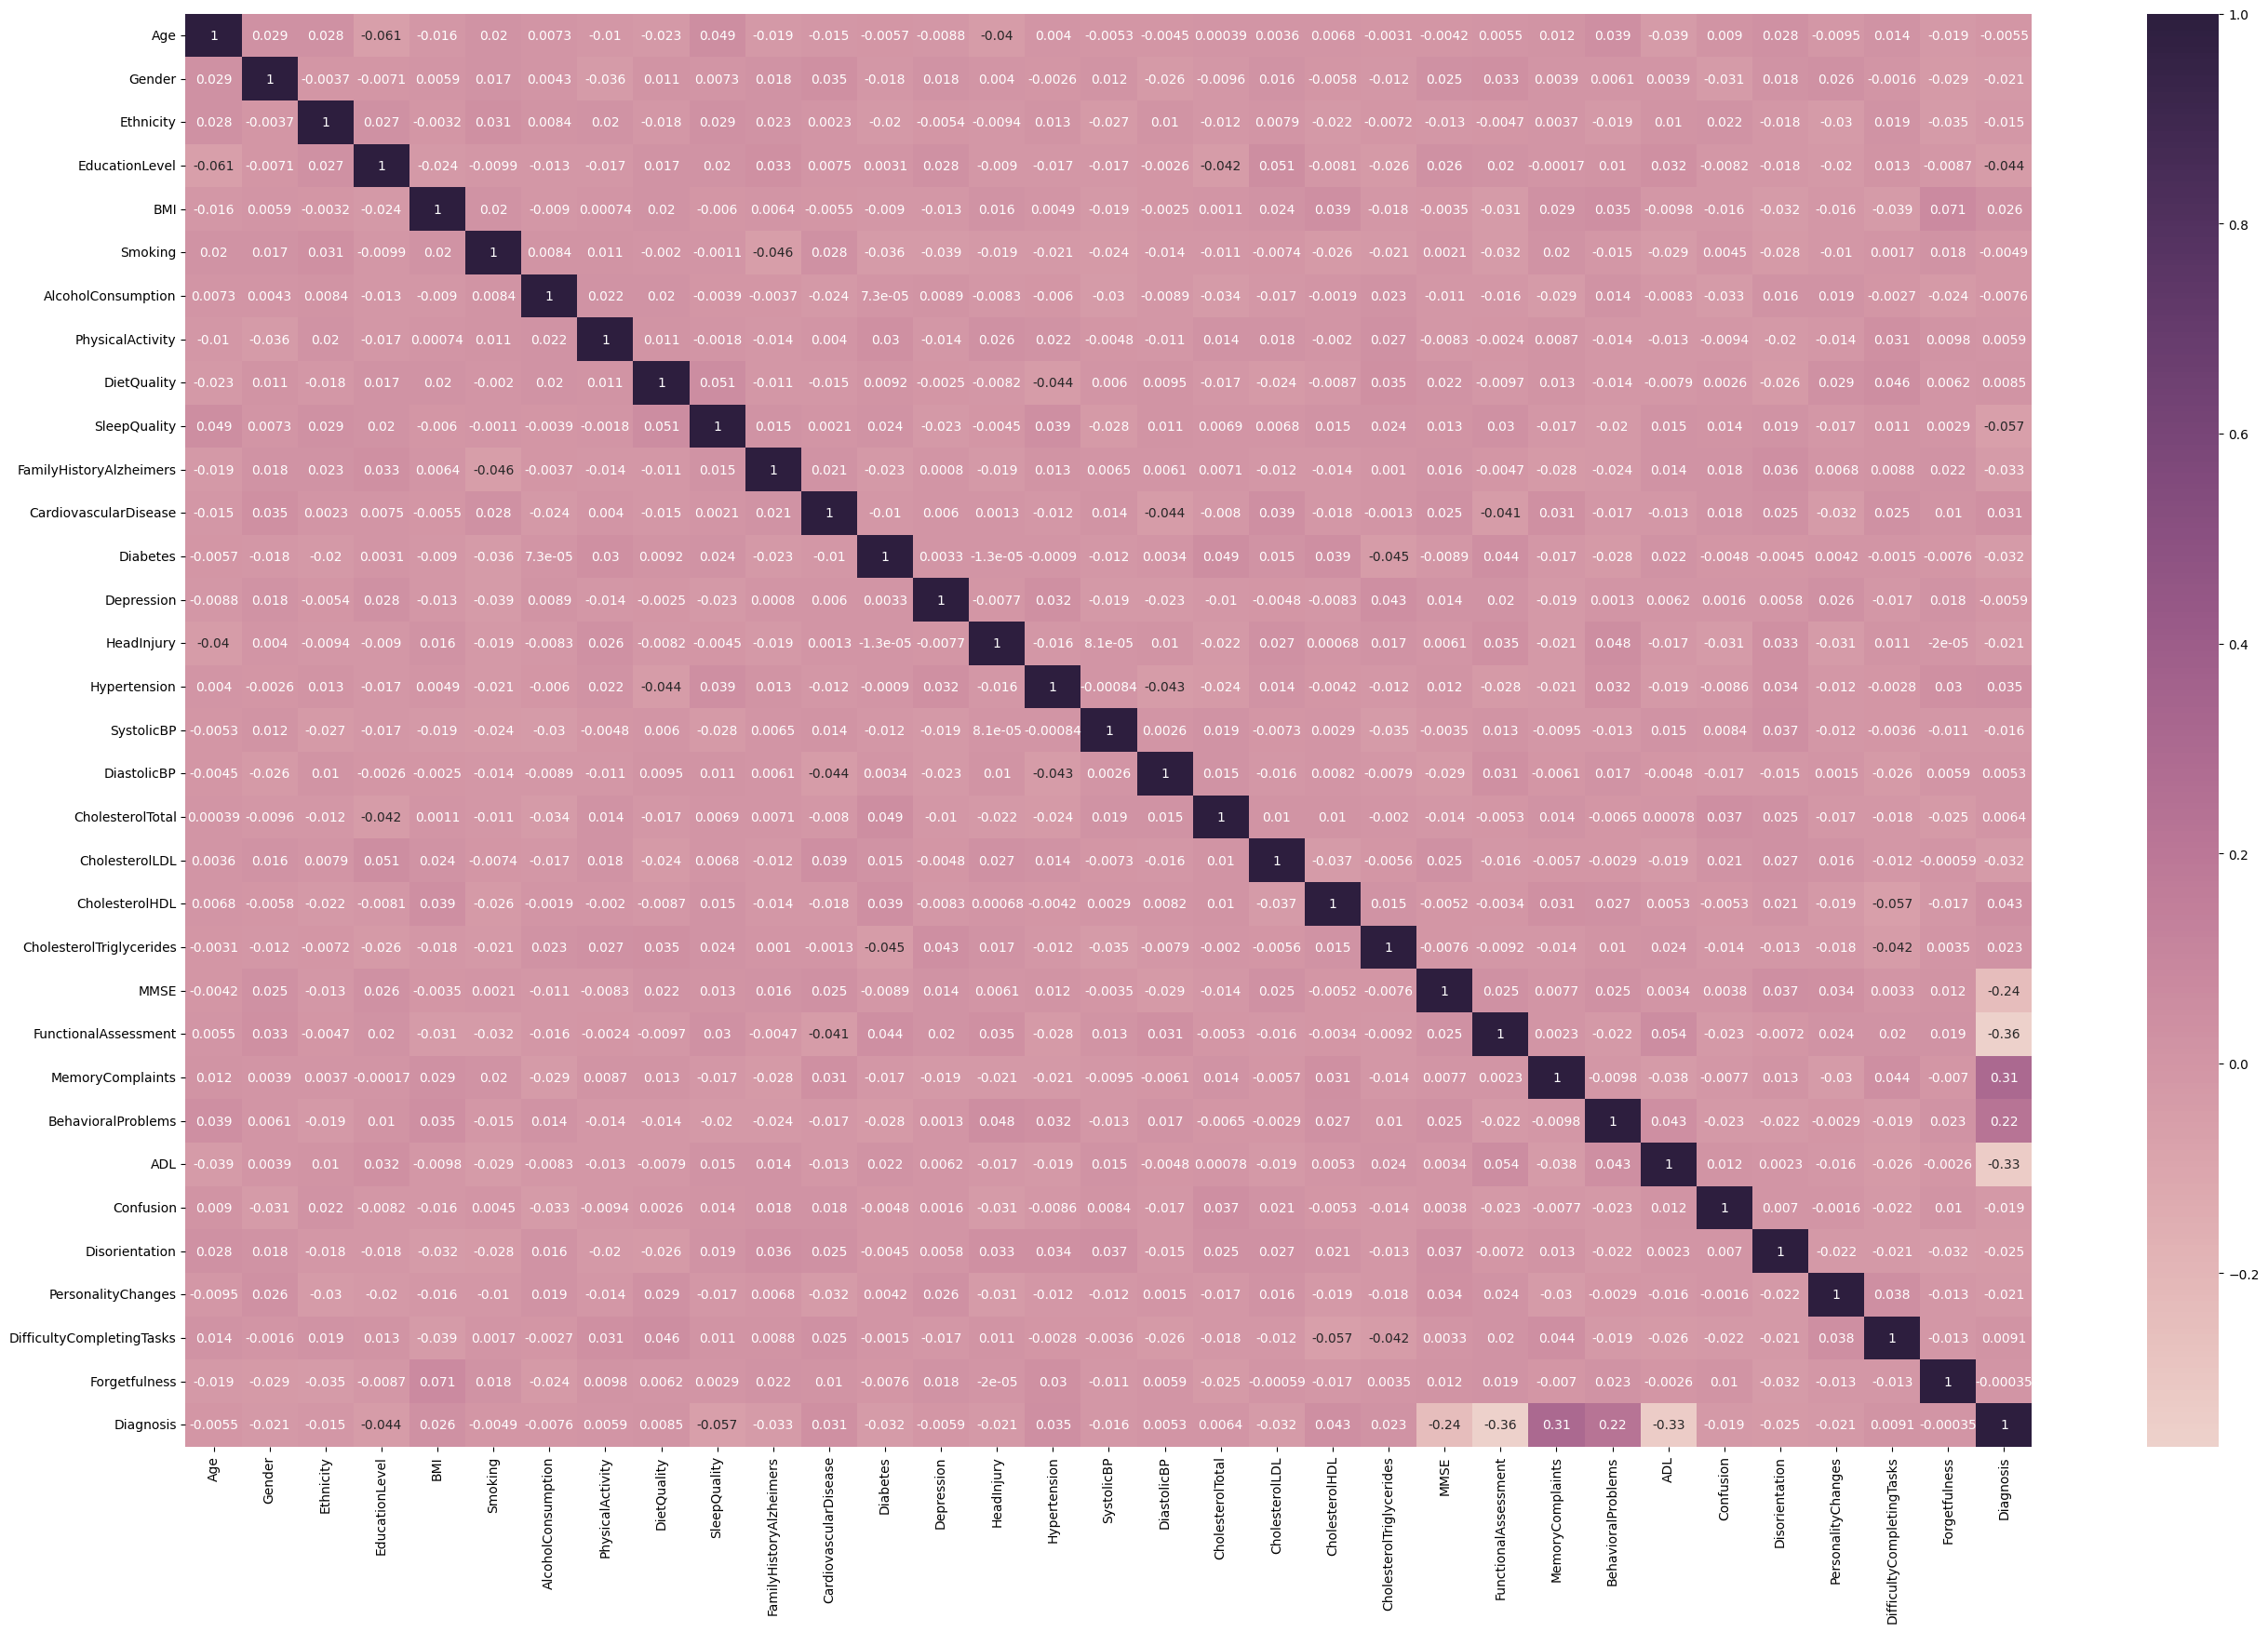

In [13]:
plt.figure(figsize=(32, 20))
sns.heatmap(alz_df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

The correlation matrix doesn't show highly correlated data. The highest values are:

- Diagnosis and BehavioralProblems (0.22)
- Diagnosis and MemoryComplaints (0.31)

These values are not considerably high.

## Data splitting

Split train and test data. Use 80% of data to train model and the rest to test it.

In [14]:
def split_data(df, tgt, sp_test_size):
    X = df.drop(columns=[tgt])
    y = df[tgt]
    return train_test_split(X, y, test_size=sp_test_size, random_state=42)

X_train, X_test, y_train, y_test = split_data(alz_df, target, 0.2)

# Graphics defintions

An abstraction to plot different sort of graphics

In [15]:
class Graphics:
    """
    Class to store methods to plot different graphics
    """
    def __init__(self, plt):
        self.plt = plt
    def get_ROC_curve(self, models, x_test, y_test, plot_title):
        model_disp = None
        for model in models:
            if model_disp == None:
                model_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
            else:
                model_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=model_disp.ax_)
        model_disp.figure_.suptitle(plot_title)
    def pie(self, data, config):
        data.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
        self.plt.title(config['legend'])
        self.plt.legend(data.index, title=config['title'], loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)
        self.plt.show()
    def bar(self, data, config):
        data.plot.bar(x=config['x_label'], y=config['y_label'], figsize=(8, 8))
        self.plt.title(config['legend'])
        self.plt.legend(data.index, title=config['title'], loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)
        self.plt.show()

graphics = Graphics(plt)

## Diagnosis distribution (Target)

View the distributed diagnosis data in a pie chart

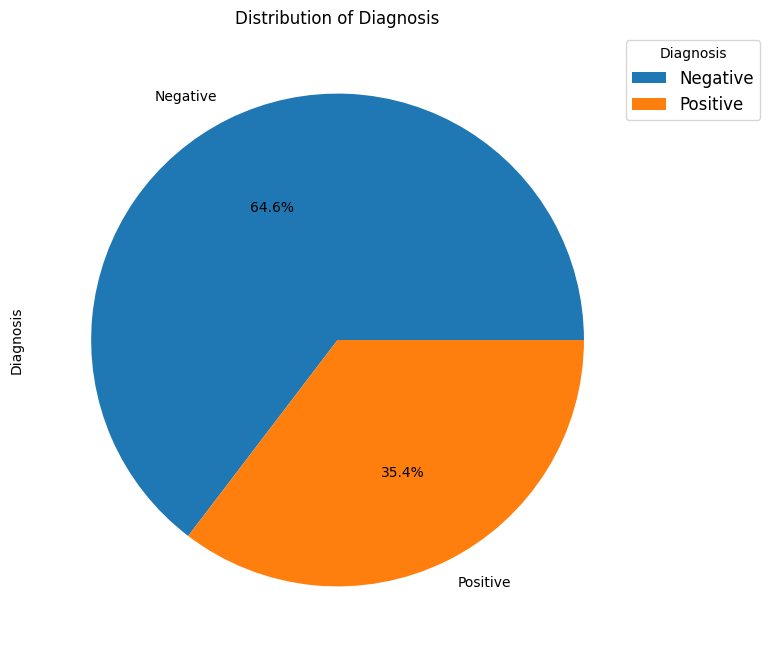

In [16]:
diagnosis_count = alz_df[target].value_counts()
# Map Diagnosis count with Negative and Positive labels
array_count = diagnosis_count.to_numpy()
map_diagnosis_df_with_labels = pd.DataFrame({
    'Diagnosis': {
        'Negative': array_count[0],
        'Positive': array_count[1]
    }
})
diagnosis_distribution = map_diagnosis_df_with_labels[target]
graphics.pie(diagnosis_distribution, {
    'legend': 'Distribution of Diagnosis',
    'title': 'Diagnosis'
})

## ROC Curve
Here we will be comparing the ROC curve and AUC value between an ensemble classifier, in this case a Random Forest classifier with a max depth of 5 and a number of 200 trees and a Logistic Regression model

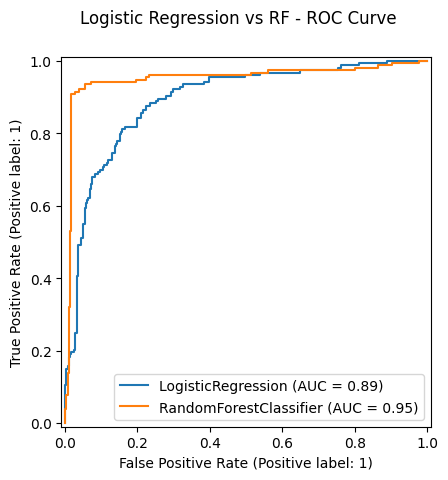

In [17]:
# since there are some unbalanced features, we will be using the class weight argument balanced
logistic_model = LogisticRegression(solver='liblinear', class_weight='balanced')
logistic_model.fit(X_train, y_train)
ensemble_rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
ensemble_rf_model.fit(X_train, y_train)
graphics.get_ROC_curve([logistic_model, ensemble_rf_model], X_test, y_test, 'Logistic Regression vs RF - ROC Curve')

# Model prediction



In [18]:
y_pred_rf = ensemble_rf_model.predict(X_test)
y_pred_logisitc = logistic_model.predict(X_test)

# Error for both classifiers

Measure error on predictions from both classifiers

In [19]:
def get_error (y_test, y_pred):
    y_results = pd.DataFrame({'test': y_test, 'pred': y_pred})
    error_list = y_results['test'] != y_results['pred']
    return 100 * round(error_list.sum() / len(y_test), 4)

print (f"Error for Logistic Regression {get_error(y_test, y_pred_logisitc)}%")
print (f"Error for Random Forest {get_error(y_test, y_pred_rf)}%")


Error for Logistic Regression 16.98%
Error for Random Forest 9.07%


# Precision for both classifiers
Now, we compute the precission and recall to define how accurate both predictions are

In [20]:
def print_recall_and_precision(y_test, y, classifier):
    precision = precision_score(y_test, y)
    recall = recall_score(y_test, y)
    
    print(f"Model Precision for {classifier}: ",'{0:.2%}'.format(precision))
    print(f"Model Recall for {classifier}: ",'{0:.2%}'.format(recall))

## Precision and Recall for Logistic Regression

In [21]:
print_recall_and_precision(y_test, y_pred_logisitc, 'Logistic Regression')

Model Precision for Logistic Regression:  74.10%
Model Recall for Logistic Regression:  80.39%


## Precision for Random Forests

In [22]:
print_recall_and_precision(y_test, y_pred_rf, 'Random Forests')

Model Precision for Random Forests:  95.97%
Model Recall for Random Forests:  77.78%


# Conclusions

At this point we will be extracting and visualizing the most important features

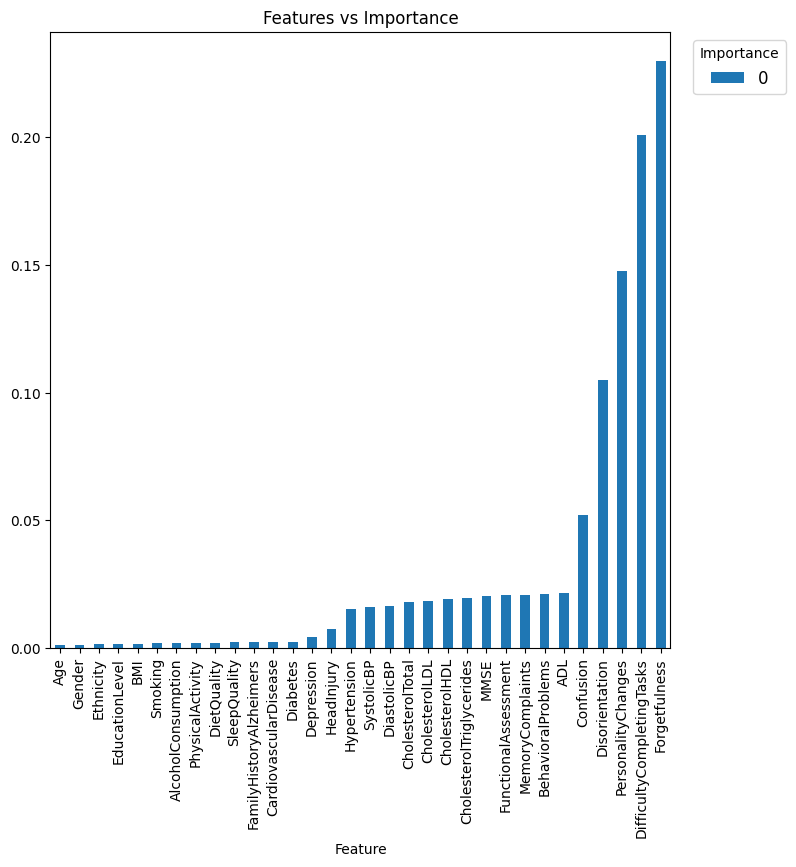

In [23]:
feature_importances_list = ensemble_rf_model.feature_importances_
cols = X_train.columns
feature_importances_data = pd.DataFrame({'Feature': cols, 
                                           'Importance': np.sort(feature_importances_list)})

graphics.bar(feature_importances_data, {
    'legend': 'Features vs Importance',
    'title': 'Importance',
    'x_label': 'Feature',
    'y_label': 'Importance',
    'labels': '',
})

The Feature importance property tells us how important was a certain feature to the algorithm, in our specific case we can only get this information from the Random Forest algorithm. We can see that, the top 5 important features are Forgetfulness, Difficulty Completing Tasks, Personality Changes, Disorientation, and Confusion. These 5 features were key to classify data in the Random Forest model since as it was previously mentioned, it is not available in the Logistic Regression model that was used during this implementation.

## Reports

In [24]:
def print_reports(y):
    for y_pred, y_test, label in y:
        report = classification_report(y_test, y_pred)
        print (f"Report for {label}")
        print ('')
        print (report)
        print ('--------------------------------------------------------')

In [25]:
print_reports([
    (y_test, y_pred_logisitc, 'Logistic Regression'),
    (y_test, y_pred_rf, 'Random Forests')
])

Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       264
           1       0.80      0.74      0.77       166

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.82       430
weighted avg       0.83      0.83      0.83       430

--------------------------------------------------------
Report for Random Forests

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       306
           1       0.78      0.96      0.86       124

    accuracy                           0.91       430
   macro avg       0.88      0.92      0.90       430
weighted avg       0.92      0.91      0.91       430

--------------------------------------------------------


The report shows a percentage for each 1 and 0 label, it's wise to focus more on the results for 1's predictions since our goal is to be accurate when interpreting positive cases. Based on the report and the ROC Curve, we can draw some conclusions.

- Precision value shows a slightly higher value for Logistic Regression, scoring **80%**, meanwhile, Random forests scored **78%**, however, the macro average precision for Random Forests is much better than the Logistic Regression.
- Recall, is an important measure for the Alzheimer's problem since it tells how many cases are classified as positive (true positives). The recall metric ensures that the most true positive cases are covered, so a high value for recall shows that we are leaving fewer positive values misclassified as negative ones. In this case, the RF model performs better, since it has a recall of **96%** compared to **74%** for the Logistic Regression model's recall,  for positive cases.
- The AUC value for the Logistic Regression was **0.89**, while the Random Forests AUC value was **0.95**. This tells that Random Forests is performing better than Logistic Regression.
- Also the ROC curve shows a more "squared" shape for the RF and it is closer to the left top corner.

The algorithm that I'd choose to predict Alzheimer's in a person would be Random Forest. First of all, the features in this dataset are not so difficult to collect, especially the most important ones (Forgetfulness, Difficulty Completing Tasks, Personality Changes, Disorientation, and Confusion). Furthermore, the recall values obtained for both models, show that RF would perform better in an unbalanced dataset predicting positive cases. Finally, the AUC value for the Random Forest is greater than the value for the Logistic Regression model, and the ROC curve shows that the RF algorithm classifies false positive data better than Logistic Regression.

Regarding the measured error in both models, we can see that the Logistic Regression got an approximate error of **17%**, on the other hand, RF bearly got a **9%** error, which makes Random Forest models less prone to overfit.

# Experimental Phase - Refine Dataset

Based on the importance feature results, I'll remove all features with "low" importance and re-run the algorithms to see if the results are improved. The criteria used to remove the low-importance features is to get rid of those below 0.01

In [26]:
features_to_remove = np.array(list(filter(lambda x: x[1] < 0.01,feature_importances_data.to_numpy())))
new_alz_df = alz_df.drop(columns=features_to_remove[:,0])

In [27]:
X_train, X_test, y_train, y_test = split_data(new_alz_df, target, 0.2)

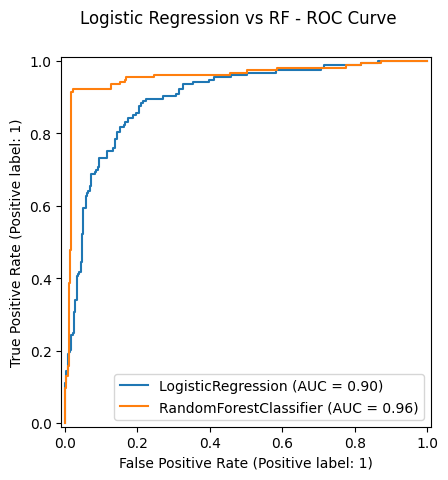

In [28]:
# since there are some unbalanced features, we will be using the class weight argument balanced
logistic_model = LogisticRegression(solver='liblinear', class_weight='balanced')
logistic_model.fit(X_train, y_train)
ensemble_rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
ensemble_rf_model.fit(X_train, y_train)
graphics.get_ROC_curve([logistic_model, ensemble_rf_model], X_test, y_test, 'Logistic Regression vs RF - ROC Curve')

In [29]:
y_pred_rf = ensemble_rf_model.predict(X_test)
y_pred_logisitc = logistic_model.predict(X_test)

In [30]:
def get_error (y_test, y_pred):
    y_results = pd.DataFrame({'test': y_test, 'pred': y_pred})
    error_list = y_results['test'] != y_results['pred']
    return 100 * round(error_list.sum() / len(y_test), 4)

print (f"Error for Logistic Regression {get_error(y_test, y_pred_logisitc)}%")
print (f"Error for Random Forest {get_error(y_test, y_pred_rf)}%")

Error for Logistic Regression 16.74%
Error for Random Forest 5.58%


In [31]:
print_reports([
    (y_test, y_pred_logisitc, 'Logistic Regression'),
    (y_test, y_pred_rf, 'Random Forests')
])

Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       259
           1       0.82      0.74      0.78       171

    accuracy                           0.83       430
   macro avg       0.83      0.82      0.82       430
weighted avg       0.83      0.83      0.83       430

--------------------------------------------------------
Report for Random Forests

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       291
           1       0.88      0.96      0.92       139

    accuracy                           0.94       430
   macro avg       0.93      0.95      0.94       430
weighted avg       0.95      0.94      0.94       430

--------------------------------------------------------
